In [39]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
import gym
import numpy as np
import collections 
import cv2 
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from gym.wrappers import GrayScaleObservation
from gym.wrappers import ResizeObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt
from IPython import display
import os
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import BaseCallback


class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True
    

def show_state(env, ep, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Episode %a - Step: %d Info:%s" % (ep, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    
def level(world, lev):
    env = gym_super_mario_bros.make('SuperMarioBros-' + str(world) + '-' + str(lev) + '-v0')
    env = make_env(env)
    # Start the game  
    state = env.reset() 
    return env, state
  
 
def make_env(env):
    # Setup game 
    env = JoypadSpace(env, SIMPLE_MOVEMENT)
    # Set grayscale 
    env = GrayScaleObservation(env, keep_dim=True)
    # Wrap inside the Dummy Environment
    env = DummyVecEnv([lambda: env])
    # Stack the frames
    env = VecFrameStack(env, 4, channels_order='last')  
    return env 


#TRAINING RL MODEL
def training(): 
    CHECKPOINT_DIR = './train/'
    LOG_DIR = './logs/'

    env = gym_super_mario_bros.make('SuperMarioBros-v2')
    env = make_env(env)
        
    model = A2C('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

    # Setup model saving callback
    callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

    # Train the AI model, this is where the AI model starts to learn
    model.learn(total_timesteps=1000000, callback=callback)

    model.save('thisisatestmodel')
 

# Load model 
def load_model(model_name):
    LOG_DIR = './logs/'
    model = A2C('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 
    model = A2C.load('./' + model_name)
    return model, env, state
 

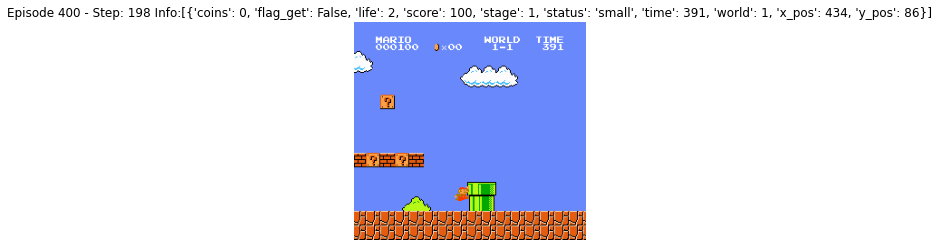

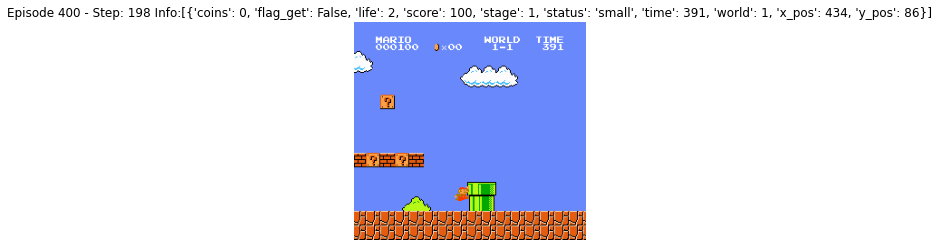

In [40]:
model, env, state = load_model('train//best_model_450000')
score = []

for i in range(0,400):
    step = 0
    done = False
    time=0
    new_position = 0
    while (done == False): 
        action, _ = model.predict(state)
        state, reward, done, info = env.step(action)

        step = step + 1

        if(step%200==0):
            if(info[0]['x_pos'] > new_position):
                new_position = info[0]['x_pos']
            else:
                done = True
                env.reset()
                break
                
        if done:
            display.clear_output(wait=True)        
            break
        
        if(step%3==0):  #buffer to only show every n frame  
            show_state(env,i+1,step,info) 
        new_position = info[0]['x_pos']
        
    score.append(new_position)

In [29]:
score

[594,
 309,
 304,
 594,
 594,
 594,
 438,
 434,
 594,
 594,
 594,
 434,
 434,
 722,
 434,
 310,
 594,
 594,
 434,
 301,
 594,
 307,
 434,
 594,
 310,
 308,
 594,
 594,
 303,
 594,
 594,
 305,
 594,
 436,
 434,
 594,
 434,
 313,
 594,
 594,
 434,
 722,
 594,
 594,
 594,
 594,
 594,
 435,
 594,
 594,
 310,
 594,
 308,
 310,
 311,
 594,
 594,
 434,
 435,
 308,
 434,
 308,
 594,
 722,
 722,
 594,
 434,
 594,
 594,
 304,
 722,
 594,
 722,
 594,
 594,
 298,
 594,
 594,
 594,
 594,
 594,
 594,
 307,
 434,
 309,
 310,
 594,
 308,
 722,
 594,
 302,
 434,
 594,
 594,
 594,
 594,
 434,
 434,
 594,
 594,
 594,
 434,
 594,
 434,
 594,
 301,
 722,
 309,
 594,
 434,
 594,
 594,
 304,
 434,
 434,
 309,
 594,
 594,
 594,
 594,
 594,
 307,
 594,
 594,
 594,
 594,
 308,
 594,
 594,
 296,
 299,
 594,
 594,
 306,
 434,
 594,
 594,
 434,
 313,
 594,
 434,
 307,
 594,
 300,
 434,
 594,
 309,
 594,
 594,
 312,
 310,
 434,
 594,
 594,
 434,
 594,
 594,
 434,
 700,
 434,
 596,
 298,
 594,
 594,
 594,
 302,
 594

In [33]:
score[400]

IndexError: list index out of range

In [38]:
sum = 0
for x in score:
    sum = sum + x

sum/len(score)

502.4775